# PENSAMIENTO ESTADÍSTICO.

# Inferencia estadística:

**La inferencia estadística es el conjunto de métodos y técnicas que permiten inducir, a partir de la información empírica proporcionada por una muestra, cual es el comportamiento de una determinada población con un riesgo de error medible en términos de probabilidad.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://assets.datacamp.com/production/course_1550/datasets/female_literacy_fertility.csv'

df = pd.read_csv(url, sep=',')

df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,"1,324,655,000"
1,Inde,ASI,50.8,2.682,"1,139,964,932"
2,USA,NAM,99.0,2.077,"304,060,000"
3,Indonésie,ASI,88.8,2.132,"227,345,082"
4,Brésil,LAT,90.2,1.827,"191,971,506"


EL DataSet contiene 5 columnas, Country que es el país a analizar, Continent es el continente al que pertenece el país a analizar, 'female literacy' es el porcentaje de alfabetismo en dicho país, 'fertility' es el número de hijos por mujer y por último la población del país.

Nuestro objetivo es determinar y analizar si hay una correlación entre el % de Analfabetismo y el número de hijos.

Por ello para calcular Analfabetismo o illiteracy debemos restar al 100% el % que corresponde a la columna 'female literacy'

In [3]:
df['illiteracy_rate'] = 100-df['female literacy']

In [4]:
illiteracy = np.array(df['illiteracy_rate'])
fertility = np.array(df['fertility'])

print(illiteracy)
print(fertility)

[ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 81.8 39.  11.2 67.
  4.1  0.2 78.1  1.   7.1  1.  29.   1.1 11.7 73.6 33.9 14.   0.3  1.
  0.8 71.9 40.1  1.   2.1  3.8 16.5  4.1  0.5 44.4 46.3 18.7  6.5 36.8
 18.6 11.1 22.1 71.1  1.   0.   0.9  0.7 45.5  8.4  0.   3.8  8.5  2.
  1.  58.9  0.3  1.  14.  47.   4.1  2.2  7.2  0.3  1.5 50.5  1.3  0.6
 19.1  6.9  9.2  2.2  0.2 12.3  4.9  4.6  0.3 16.5 65.7 63.5 16.8  0.2
  1.8  9.6 15.2 14.4  3.3 10.6 61.3 10.9 32.2  9.3 11.6 20.7  6.5  6.7
  3.5  1.   1.6 20.5  1.5 16.7  2.   0.9]
[1.769 2.682 2.077 2.132 1.827 3.872 2.288 5.173 1.393 1.262 2.156 3.026
 2.033 1.324 2.816 5.211 2.1   1.781 1.822 5.908 1.881 1.852 1.39  2.281
 2.505 1.224 1.361 1.468 2.404 5.52

## Calcular la correlación de Pearson.

In [5]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [6]:
r = pearson_r(illiteracy, fertility)

print(r)

0.8041324026815347


el coeficiente de Pearson nos dice que hay un 80% de correlación entre el grado de analfabetismo y el número de hijos que tiene una mujer, es decir, entre mas analfabeta sea la población femenina de un país mayor será la tasa de nacimientos por cada mujer.

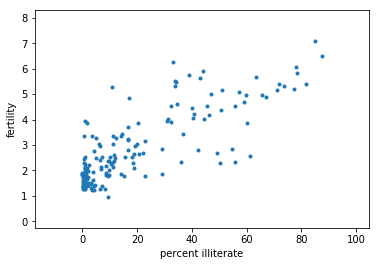

In [7]:
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.2)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
plt.show()

## Regresión lineal.

Asumimos entonces que la fertilidad es una función linear de la tasa de analfabetismo. Eso quiere decir que se rige bajo la acuación f = ai + b, donde a es la pendiente y b es el intercepto. Podemos pensar en el intercepto como la tasa mínima de fertilidad, ese es el punto en donde se corta el eje y, en este caso, visualmente corresponde a un punto muy cercano al 1.0. La pendiente nos dice que tanto cambia la fectilidad con el incremento de de la tasa de analfabetismo.

In [8]:
# Para calcular el intecepto y la pendiente usaremos np.polyfit()
# polyfit recibe 3 argumentos, x,y y el grado polinomio de la función, en este caso es 1.

a, b = np.polyfit(illiteracy, fertility, 1)

In [9]:
print('Pendiente =', a, 'niños por cada mujer / por porcentaje de analfabetismo')
print('intercepto =', b, 'niños por mujer')

Pendiente = 0.04979854809063426 niños por cada mujer / por porcentaje de analfabetismo
intercepto = 1.8880506106365562 niños por mujer


La pendiente entonces nos dice que por cada incremento en un punto porcentual en el analfabetismo habrá 0.049 niños mas por mujer.

El intercepto nos dice que la mínima tasa de niños por mujer es de 1.88 niños.

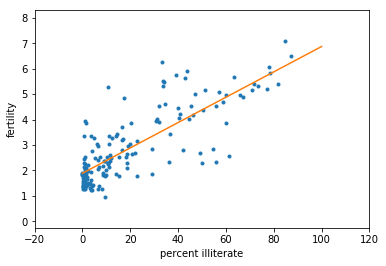

In [10]:
# Graficar la mejor línea que represente la función.
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.2)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')
x = np.array([0,100])
y = a * x + b
_ = plt.plot(x, y)
plt.show()

# Boostraping

Boostrap es una técnica de remuestreo utilizada para simular n veces la data que se quiere modelar, dicho remuestreo consiste en tomar datos aleatoriamente de la muestra original y ubicarlos en un nuevo dataset que tendrá la misma longitud del dataset original, todo esto sin afectar el dataset original. Esta técnica se conoce como sampling with replacement.

Es otras palabras es armar n datasets con datos del dataset original seleccionados y ubicados aleatoriamente.

Con estas muestras podemos obtener los estadísticos que se deseen y tener n estadisticos para su análisis, dichos estadisticos recibirían el nombre de boostrap replicates

## Ejemplo de boostraping.

En el siguiente ejemplo se realizará la simulación de un numero n de muestras de una data y se evaluará su ecdf (emperical cummulative density function).

In [11]:
# Importar archivo rainfall que contiene mediciones de la lluvia anuales en UK.

rainfall = pd.read_csv('rainfall.csv', sep=';')

rainfall.head()

,yyyy,mm,tmax_degC,tmin_degC,af_days,rain_mm,sun_hours
0,1883,1,6.3,1.7,6,122.1,0.0
1,1883,2,8.0,2.8,2,69.8,0.0
2,1883,3,4.8,-1.6,23,29.6,0.0
3,1883,4,12.2,3.8,2,74.0,0.0
4,1883,5,14.7,6.2,0,31.2,0.0


In [12]:
# Vamos a simular 50 veces la columna rain_mm que corresponde a la cantidad de lluvia registrada cada año.

# Generamos el array lluvia

lluvia =  np.array(rainfall['rain_mm'])

In [13]:
lluvia

array([122.1,  69.8,  29.6, ...,  65.8,  58.2, 130.4])

A continuacion se escribe la función ecdf que crea los argumentos x y y para crear la ecdf, recuerde que la ecdf es tomar los datos y ordernarlos en orden ascendente de modo que se pueda determinar el % acumulado de la data.

In [14]:
def ecdf(data):
    
    # Numero de datos de la data
    n = len(data)

    # Se ordenan los datos y esto genera el eje x
    x = np.sort(data)

    # se establece el porcentaje acumulado y esto genera el eje y
    y = np.arange(1, n+1) / n

    return x, y

Se genera una función para la simulación de los n ecdf que se desea modelar.

In [15]:
def btmodelado(veces,data):
    
    for _ in range(veces):
        # Generate bootstrap sample: bs_sample
        bs_sample = np.random.choice(data, size=len(data))

        # Compute and plot ECDF from bootstrap sample
        x, y = ecdf(bs_sample)
        _ = plt.plot(x, y, marker='.', linestyle='none',color='gray', alpha=0.1)
        
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker='.')
    # Make margins and label axes
    plt.margins(0.02)
    _ = plt.xlabel('data')
    _ = plt.ylabel('ECDF')

    # Show the plot
    plt.show()

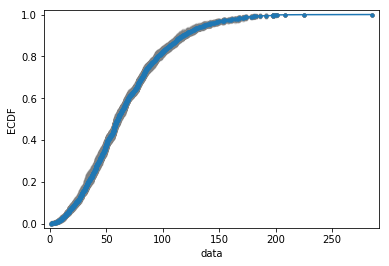

In [16]:
# Ahora generamos la modelación usando Boostrapping.

btmodelado(50,lluvia)

La grafica representa n data sets creados con boostrap, pero lo que realmente se analiza son los estadísticos que salen de dichas muestras, por ejemplo la media, o la mediana o la moda o cualquier estadistico.

En la siguiente función realizaremos el mismo proceso pero esta vez se almacenarán los estadísticos y se analizarán los mismos.

In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [18]:
replicas = draw_bs_reps(lluvia, np.mean, size=10000)

In [19]:
print(replicas)

[66.74656679 68.56410737 67.40530587 ... 67.0164794  66.82709114
 66.00387016]


In [20]:
len(replicas)

10000

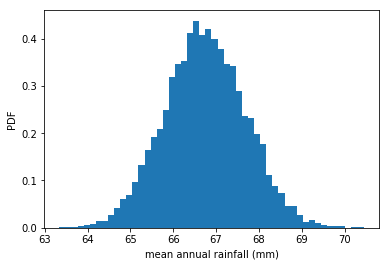

In [21]:
# Make a histogram of the results
_ = plt.hist(replicas, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

## Intervalos de confianza.

In [22]:
np.percentile(replicas, [2.5, 97.5])

array([64.89600343, 68.59325375])

Con un intervalo de confianza del 95% se puede inferir que el 95% de los niveles de lluvía medidos estarán entre 64.89 milimétros y 68.63 milímetros.

Lo que también podemos councluir es que la media es normalmente distrubuida.

In [23]:
replicas_var = draw_bs_reps(lluvia, np.var, size=10000)

replicas_var = replicas_var/100

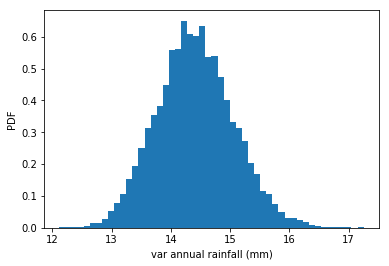

In [24]:
# Make a histogram of the results
_ = plt.hist(replicas_var, bins=50, density=True)
_ = plt.xlabel('var annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [25]:
np.percentile(replicas_var, [2.5, 97.5])

array([13.18733052, 15.72164718])

## Pruebas de hipótesis.

Es la evaluación de que tan razonables son los datos asumiendo que la hipótesis nula es verdadera.

En nuestro ejemplo la Prueba de hipótesis es que tan razonable es asumir que rain_july y rain_november son identicamente distribuidos.

Para probar la si la hipótesis es verdadera debemos simular si rain_july es identicamente distribuido a rain_november, esta simulación se realiza bajo una técnica llamada **premutación**

**Permutación**: Es la prueba de simulación que se realiza a los datos para comprobar si dos variables tienen la misma distribución de probabilidad.

La hipótesis de que tienen la misma distribución en la llamana hipótesis nulla o H0.

El proceso consiste en concatenar los datos de las dos variables teniendo claro el número de datos de cada variable, mezclar dichos datos y luego asignar datos en la misma cantidad que se tenían originalmente.

#### Función para generar permutación entre dos variables

In [26]:
def permutation_sample(data1,data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [27]:
rain_july = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])

In [28]:
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

Se tienen los array rain_july y rain_november, ambos contienen la cantidad de lluvia que cae en cada mes, se espera que ambos meses posean la misma distribución de probabilidad. Entonces lo que haremos es generar las muestras permutadas con la función permutation_sample y su ECDF y posteriormente graficar la ECDF de las muestra original.

Si la hipótesis de que ambos array son identicamente distrbuidos se debe de ver que las muestras permutadas deben de ser iguales a las reales, si no es así la hipótesis es rechazada.

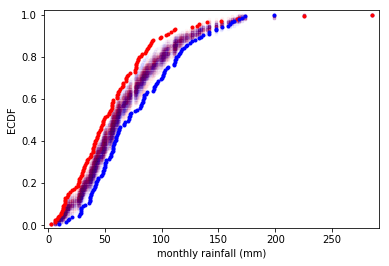

In [29]:
# Generamos 50 muestras permutadas de los datos, esto generará una zona 
# en donde se ubicará cada ecdf para cada muestra.

for _ in range(50):
    # Generamos las muestras permutadas con la función que se definió anteriormente
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july,rain_november)


    # Calculamos las ECDFs para cada muestra
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Se grafica cada ecdf
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Crear la ecdf y su grafico para los array originales
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# margenes y titulo
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Como se puede observar ninguna de las 50 simulaciones de permutación se cruza con los datos reales. Por lo tanto se podría inferir de que los array no son indenticos.

Pero esto sigue siendo una conclusión a la ligera y visual, es para esto que se realzian las pruebas de hipótesis y en donde se calcula el P-value.

### Prueba de Hipótesis.

Es la evaluación de que tan razonables son los datos asumiendo que la hipótesis nula es verdadera.

En nuestro ejemplo la Prueba de hipótesis es que tan razonable es asumir que rain_july y rain_november son identicamente distribuidos.

H0 = rain_july = rain_november

H1 = rain_july <> rain_november

Ahora, esa evaluación de que tan razonable son los datos versus la hipótesis nula debe ser medida, esa medición sale de un **test estadístico**, el resultado de ese test estadístico es un número que compara los datos observados versus la simulación de esos mismos datos.

El **test estadístico** debe ser seleccionado teniendo en cuenta cual es la pregunta que se quiere resolver, en este caso nos interesa saber si rain_july y rain_november son identicamente distribuidos, para ello podemos seleccionar como **test estadístico** la diferencia en las medias entre los datos observados y la simulación, si son identicamente distribuidos la diferencia debe de ser mínima.

En nuestro caso de ejemplo debemos hallar las diferencias entre las medias reales y simular n veces ese test estadístico para comparlos contra al realidad.

El P-value nos indica la probalbilidad de obtener mínimo el valor del test estadístico esperado asumiendo que la hipótesis es verdadera.

En nuestro ejemplo es la probabilidad de que la diferencia de las medias de n permutaciones sea al menos -21.11 o mayor.




In [30]:
# La diferencia entre las medias reales.
np.mean(rain_november) - np.mean(rain_july)

21.114285714285714

In [31]:
# Función para generar n permutaciones de los data1 y data2
# Se generan n replicas permutadas - Se calcula el test estadístico-
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [32]:
# Se genera una función para calcular el test estadístico para las replicas permutadas

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [33]:
# Calculamos la diferencia de medias
empirical_diff_means = diff_of_means(rain_november, rain_july)

# Simulamos 10.000 test estádisticos 
perm_replicates = draw_perm_reps(rain_november, rain_july,
                                 diff_of_means, size=10000)

# Calculamos p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print(empirical_diff_means)
print('p-value =', p)

21.114285714285714
p-value = 0.0


El P-value nos indica que hay 0.0 de probalidad de que la diferencia de medias simuladas sean al menos de 21.11.

Por lo tanto se rechaza la Hipótesis de que rain_July = rain_november.

## Hypothesis test on Pearson correlation

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis.

Dado esto:

H0 = Fertilidad es totalmente independiente de Analfabetismo, es decir, su correlación es baja.

En el primer ejercicio de este libro habíamos calculado que dicha correlación bajo el coeficiente de Pearson era del 0.8041, una correlación positiva alta, pero dicho resultado efectuado una sola vez con los datos que se tenían pudo haber sido producto del azar, en este ejercicio vamos a generar muchas simulaciones para calcular un P-value que nos indique la proporción de simulaciones que alcanzaron mínimo este nivel de correlación.

In [36]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs)/len(perm_replicates)
print('p-val =', p)

p-val = 0.0
